# Instructions
* **<font color="red">When you load this page, go to "Cell->Run All" to start the program running.  After that point, you should be able to use the sliders and buttons to manipulate the output.</font>**  
* If things go totally awry, you can go to "Kernel->Restart"  and then "Cell->Run All".  A more drastic solution would be to close and reload the page, which will reset the code to its initial state.  
* If you're interested in programming, click the "Toggle raw code" button.  This will expose the underlying program, written in the Python3 programming language.  You can edit the code to your heart's content: just go to "Cell->Run All" after you modify things so the changes will be incorporated.  Text in the code blocks preceded by `#` are comments to guide you through the excercise and/or explain the code



In [1]:
# -----------------------------------------------------------------------------------
# Javascript that gives us a cool hide-the-code button 

from IPython.display import HTML

HTML('''

<script>
    code_show=true; 
    
    function code_toggle() {
     if (code_show){
         $('div.input').hide();
     } else {
         $('div.input').show();
     }
     code_show = !code_show
    } 
    
    $( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()">
    <input type="submit" value="Toggle raw code">
</form>

''')

# ------------------------------------------------------------------------------------

## Michaelis-Menten Simulator

This program simulates a Michaels-Menten enzyme.  The left panel shows product formation over time for several values of initial substrate concentration $[S]_{0}$, denoted by different colors.  The solid lines show the product concentration, the dashed lines show the initial value of $d[P]/dt$ for that $[S]_{0}$. 

$d[P]/dt$ depends on both the velocity of the reaction $V_{0}$ and the starting concentration of substrate $[S]_{0}$:

$$\frac{d[P]}{dt} = V_{0} \cdot [S]_{0}$$

The right panel shows a Michaelis-Menten plot of $V_{0}$ versus $[S]_{0}$.  By fitting the Michaelis-Menten model to these data, we can determine $k_{cat}$ and $K_{M}$:

$$V_{0} = k_{cat} \cdot [E]_{T} \cdot \Big ( \frac{[S]_{0}}{[S]_{0} + K_{M}} \Big ) $$

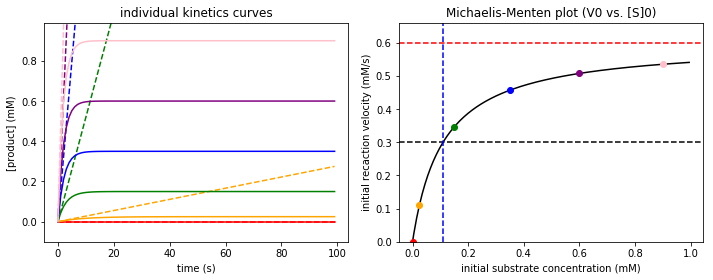

In [1]:
#Import libraries that do things like plot data and handle arrays
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np

# libraries for making pretty sliders
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display


def michaelis_menten(initial_substrate,kcat,Km,Etot):
    """
    The Michaelis-Menten equation.
    """
    
    
    initial_velocity = (kcat*Etot*initial_substrate)/(Km+initial_substrate)
    
    return initial_velocity

def plot_michaelis_menten(kcat,Km,Etot):
    """
    Create a pretty plot of a Michaelis-Menten curve given kcat, Km, and Etot.  This
    assumes substrate concentrations between 0 and 1 mM.
    """
    
    Etot = Etot*1e-3
    
    # colors for each experiment
    color_array = ["red","orange","green","blue","purple","pink"]
    
    # substrate concentrations (mM)
    substrate_concentrations = np.array([0,0.025,0.15,0.35,0.6,0.9],dtype=float)
    
    # array of times, from 0 to 100 s
    t = np.array(range(0,100,1),dtype=float)
    
    # Create main plot
    fig, ax = plt.subplots(1,2)
    
    # -----------------------------
    # Raw kinetics plots
    # -----------------------------
    
    two_point = np.array([0,max(t)])
    for i, s in enumerate(substrate_concentrations):
        v = michaelis_menten(s,kcat,Km,Etot)
        ax[0].plot(t,s*(1-np.exp(-v*t)),color=color_array[i])
        ax[0].plot(two_point,two_point*v*s,"--",color=color_array[i])
    
    # Set axes and title
    ax[0].set_ylim([-0.1,1.1*max(substrate_concentrations)])
    ax[0].set_title("individual kinetics curves")
    ax[0].set_xlabel("time (s)")
    ax[0].set_ylabel("[product] (mM)")
    
    # -----------------------------
    # Michaelis Menten Plot
    # -----------------------------
    
    # Create smooth curve from 0 to 1 mM
    smooth_x = np.array(range(0,1000,5),dtype=float)*0.001
    smooth_y = michaelis_menten(smooth_x,kcat,Km,Etot)
    ax[1].plot(smooth_x,smooth_y,color="black")
   
    # Create individual points
    for i, s in enumerate(substrate_concentrations):
        ax[1].plot(s,michaelis_menten(s,kcat,Km,Etot),'ro',color=color_array[i])
        
    # Draw various indicator lines
    ax[1].axhline(y=kcat*Etot,color="red",linestyle="dashed")
    ax[1].axhline(y=kcat*Etot/2,color="black",linestyle="dashed")
    ax[1].axvline(x=Km,color="blue",linestyle="dashed")
    
    # Set y plot dimensions
    if kcat*Etot > 0:
        ax[1].set_ylim([0,kcat*Etot*1.1])
    else:
        ax[1].set_ylim([0,1])
    
    # axis labels
    ax[1].set_title("Michaelis-Menten plot (V0 vs. [S]0)")
    ax[1].set_xlabel("initial substrate concentration (mM)")
    ax[1].set_ylabel("initial recaction velocity (mM/s)")

    fig.set_figwidth(10)
    fig.tight_layout()
    plt.show()
    
    
# graph for running display
kcat_slider = widgets.FloatSlider(min=100,max=3000,step=100,value=300,description="kcat (1/s)")
Etot_slider = widgets.FloatSlider(min=0.1,max=5,by=0.5,value=0.1,description="Etot (uM)")
Km_slider = widgets.FloatSlider(min=0.01,max=1,by=0.05,value=0.05,description="Km (mM)")

w = widgets.interactive(plot_michaelis_menten,
                        kcat=kcat_slider,
                        Etot=Etot_slider,
                        Km=Km_slider)
                        
display(w)


$S_{0}$ (mM) | color
-------------|-------
<font color="red">0.00</font> | <font color="red">red</font>
<font color="orange">0.03</font> | <font color="orange">orange</font>
<font color="green">0.15</font> | <font color="green">green</font>
<font color="blue">0.35</font> | <font color="blue">blue</font>
<font color="purple">0.60</font> | <font color="purple">purple</font>
<font color="black">0.90</font> | <font color="pink">pink</font>